In [3]:
#import relevant packages
import pandas as pd
import numpy as np 
import time
import matplotlib
from matplotlib import pyplot as plt
import random

**Display Data**

In [4]:
df = pd.read_csv("Day Tasks.csv")
right_aligned_df_2 = df.style.set_properties(**{'text-align': 'right'})
display(right_aligned_df_2)

,id,duration/minutes,description,dependencies,status
0,0,180,8 am: Lab Work,nan,not_yet_started
1,1,270,11 am: CS110 Pre-Class Work,0,not_yet_started
2,2,150,4 pm: Take a tour of National Taiwan Museum,"0,1",not_yet_started
3,3,160,7 pm: Light Sky Lanterns at a festival,"0,1,2",not_yet_started
4,4,75,9:30 pm: Visit Taipei Night Market for Scallion pancakes,"0,1,2,3",not_yet_started
5,5,30,10 pm: Returning to the res-hall via a bus,"0,1,4",not_yet_started
6,7,30,10:30 pm: Laundry,"0,1,4,5",not_yet_started
7,6,30,11:30 pm: Talking with Minervans,"0,1,4,5",not_yet_started


In [5]:
df = pd.read_csv("Day Tasks - Sheet1.csv")
right_aligned_df = df.style.set_properties(**{'text-align': 'right'})
display(right_aligned_df)

,id,duration/minutes,description,dependencies,status,p(achieveing task),priority values
0,0,180,8 am: Lab Work,nan,not_yet_started,0.900000,162.000000
1,1,270,11 am: CS110 Pre-Class Work,0,not_yet_started,1.000000,270.000000
2,2,150,4 pm: Take a tour of National Taiwan Museum,"0,1",not_yet_started,0.500000,75.000000
3,3,160,7 pm: Light Sky Lanterns at a festival,"0,1,2",not_yet_started,0.300000,48.000000
4,4,75,9:30 pm: Visit Taipei Night Market for Scallion pancakes,"0,1,2,3",not_yet_started,0.700000,52.500000
5,5,30,10 pm: Returning to the res-hall via a bus,"0,1,4",not_yet_started,1.000000,30.000000
6,7,30,10:30 pm: Laundry,"0,1,4,5",not_yet_started,0.300000,9.000000
7,6,30,11:30 pm: Talking with Minervans,"0,1,4,5",not_yet_started,0.500000,15.000000


***Q3:A***

In [6]:
#Code from PCW Session 7.2 Heapsorts and Priority Queues
#The code was used similar to the one I did in PCW
class MaxHeapq:
    """ 
    A class that implements properties and methods 
		that support a max priority queue data structure

		Attributes
	  ----------
	  heap : arr
	      A Python list where key values in the max heap are stored
	  heap_size: int
	      An integer counter of the number of keys present in the max heap
	  """  

    def __init__(self):    
        """
        Parameters
        ----------
        None
        """    
        self.heap       = []
        self.heap_size  = 0
        
    def left(self, i):
        """
        Takes the index of the parent node
        and returns the index of the left child node

        Parameters
        ----------
        i: int
          Index of parent node

        Returns
        ----------
        int
          Index of the left child node

        """
        return 2 * i + 1

    def right(self, i):
        """
        Takes the index of the parent node
        and returns the index of the right child node
        
        Parameters
        ----------
        i: int
            Index of parent node

        Returns
        ----------
        int
            Index of the right child node

        """

        return 2 * i + 2
		
    def parent(self, i):
        """
        Takes the index of the child node
        and returns the index of the parent node
        
        Parameters
        ----------
        i: int
            Index of child node

        Returns
        ----------
        int
            Index of the parent node

        """

        return (i - 1)//2

    def maxk(self):     
        """
        Returns the highest key in the priority queue. 
        
        Parameters
        ----------
        None

        Returns
        ----------
        int
            the highest key in the priority queue

        """
        return self.heap[0]     
    
  
    def heappush(self, key):  
        """
        Insert a key into a priority queue 
        
        Parameters
        ----------
        key: int
            The key value to be inserted

        Returns
        ----------
        None
        """
        self.heap.append(-float("inf"))
        self.increase_key(self.heap_size,key)
        self.heap_size+=1
        
    def increase_key(self, i, key): 
        """
        Modifies the value of a key in a max priority queue
        with a higher value
        
        Parameters
        ----------
        i: int
            The index of the key to be modified
        key: int
            The new key value

        Returns
        ----------
        None
        """
        if key < self.heap[i]:
            raise ValueError('new key is smaller than the current key')
        self.heap[i] = key
        while i > 0 and self.heap[self.parent(i)] < self.heap[i]:
            j = self.parent(i)
            holder = self.heap[j]
            self.heap[j] = self.heap[i]
            self.heap[i] = holder
            i = j    
            
       
    def heapify(self, i):
        """
        Creates a max heap from the index given
        
        Parameters
        ----------
        i: int
            The index of of the root node of the subtree to be heapify

        Returns
        ----------
        None
        """
        l = self.left(i)
        r = self.right(i)
        heap = self.heap
        if l <= (self.heap_size-1) and heap[l]>heap[i]:
            largest = l
        else:
            largest = i
        if r <= (self.heap_size-1) and heap[r] > heap[largest]:
            largest = r
        if largest != i:
            heap[i], heap[largest] = heap[largest], heap[i]
            self.heapify(largest)

    def heappop(self):
        """
        returns the larest key in the max priority queue
        and remove it from the max priority queue
        
        Parameters
        ----------
        None

        Returns
        ----------
        int
            the max value in the heap that is extracted
        """
        if self.heap_size < 1:
            raise ValueError('Heap underflow: There are no keys in the priority queue ')
        maxk = self.heap[0]
        self.heap[0] = self.heap[-1]
        self.heap.pop()
        self.heap_size-=1
        self.heapify(0)
        return maxk


In [7]:
#Test Cases

#T1: negative values
list_1 = [6,4,7,9,10,-5,-6,12,8,3,1,-10]
my_heap_1 = MaxHeapq()
for key in list_1:
    my_heap_1.heappush(key)
my_heap_list_1 = my_heap_1.heap
try:
    assert(my_heap_list_1 == [12, 10, 6, 9, 7, -5, -6, 4, 8, 3, 1, -10])
    print(f"✅ Your result is as expected for a heap built from {list_1}")
except:
    print("🐞 Something is not quite right, please check your code again...")


#T2: duplicates
list_2 = [6,3,5,6,1,3]
my_heap_2 = MaxHeapq()
for key in list_2:
    my_heap_2.heappush(key)
my_heap_list_2 = my_heap_2.heap
try:
    assert(my_heap_list_2 == [6, 6, 5, 3, 1, 3])
    print(f"✅ Your result is as expected for a heap built from {list_2}")
except:
    print("🐞 Something is not quite right, please check your code again...")


#T3: empty array
list_3 = []
my_heap_3 = MaxHeapq()
for key in list_3:
    my_heap_3.heappush(key)
my_heap_list_3 = my_heap_3.heap
try:
    assert(my_heap_list_3 == [])
    print(f"✅ Your result is as expected for a heap built from {list_3}")
except:
    print("🐞 Something is not quite right, please check your code again...")

#We can also use test cases like randomized array and a reveresed list for which this codes works
#but for assert statements we need heapq module which due to restrcitions of the assignment has not been show.


✅ Your result is as expected for a heap built from [6, 4, 7, 9, 10, -5, -6, 12, 8, 3, 1, -10]
✅ Your result is as expected for a heap built from [6, 3, 5, 6, 1, 3]
✅ Your result is as expected for a heap built from []


**Q3: B**
Here I have modified Heap function to use ids for heappush and heappop.

In [8]:
#Code taken from Session 7.2: Heaps and priority queues
#Code is mostly similar except I have accomodated it for my Task schulder by using id for heap methods.

class MaxHeapq:
    """ 
    A class that implements properties and methods 
		that support a max priority queue data structure

		Attributes
	  ----------
	  heap : arr
	      A Python list where key values in the max heap are stored
	  heap_size: int
	      An integer counter of the number of keys present in the max heap
	  """  

    def __init__(self):    
        """
        Parameters
        ----------
        None
        """    
        self.heap       = []
        self.heap_size  = 0
        
    def left(self, i):
        """
        Takes the index of the parent node
        and returns the index of the left child node

        Parameters
        ----------
        i: int
          Index of parent node

        Returns
        ----------
        int
          Index of the left child node

        """
        return 2 * i + 1

    def right(self, i):
        """
        Takes the index of the parent node
        and returns the index of the right child node
        
        Parameters
        ----------
        i: int
            Index of parent node

        Returns
        ----------
        int
            Index of the right child node

        """

        return 2 * i + 2
		
    def parent(self, i):
        """
        Takes the index of the child node
        and returns the index of the parent node
        
        Parameters
        ----------
        i: int
            Index of child node

        Returns
        ----------
        int
            Index of the parent node

        """

        return (i - 1)//2

    def maxk(self):     
        """
        Returns the highest key in the priority queue. 
        
        Parameters
        ----------
        None

        Returns
        ----------
        int
            the highest key in the priority queue

        """
        return self.heap[0]     
    
  
    def heappush(self, key):  
        """
        Insert a key into a priority queue 
        
        Parameters
        ----------
        key: int
            The key value to be inserted

        Returns
        ----------
        None
        """
        self.heap.append(-float("inf"))
        self.increase_key(self.heap_size,key)
        self.heap_size+=1
        
    def increase_key(self, i, key): 
        """
        Modifies the value of a key in a max priority queue
        with a higher value
        
        Parameters
        ----------
        i: int
            The index of the key to be modified
        key: int
            The new key value

        Returns
        ----------
        None
        """
        if key.id < self.heap[i]:
            raise ValueError('new key is smaller than the current key')
        self.heap[i] = key
        while i > 0 and self.heap[self.parent(i)].id < self.heap[i].id:
            j = self.parent(i)
            holder = self.heap[j]
            self.heap[j] = self.heap[i]
            self.heap[i] = holder
            i = j    
            
       
    def heapify(self, i):
        """
        Creates a max heap from the index given
        
        Parameters
        ----------
        i: int
            The index of of the root node of the subtree to be heapify

        Returns
        ----------
        None
        """
        #compares the left and right tasks
        l = self.left(i)
        r = self.right(i)
        heap = self.heap
        #considers the largest task on left
        if l <= (self.heap_size-1) and heap[l].id>heap[i].id:
            largest = l
        else:
            largest = i
        #considers the largest task on right
        if r <= (self.heap_size-1) and heap[r].id > heap[largest].id:
            largest = r
        if largest != i:
            #Organizes the heap based on prioratized task
            heap[i], heap[largest] = heap[largest], heap[i]
            self.heapify(largest)

    def heappop(self):
        """
        returns the larest key in the max priority queue
        and remove it from the max priority queue
        
        Parameters
        ----------
        None

        Returns
        ----------
        int
            the max value in the heap that is extracted
        """
        if self.heap_size < 1:
            raise ValueError('Heap underflow: There are no keys in the priority queue ')
        maxk = self.heap[0]
        self.heap[0] = self.heap[-1]
        #removes the task
        self.heap.pop()
        self.heap_size-=1
        self.heapify(0)
        return maxk

In [15]:
#Code taken from Session 7.2: Heaps and priority queues
#The code I solved with my group was mainly utilized 
#with attribute changes and changes to use MaxHeapq instead of heapq module.

class Task:
    """
    - id: Task id (a reference number)   
    - description: Task short description   
    - duration: Task duration in minutes   
    - dependencies: List of task ids that need to preceed this task  
    - status: Current status of the task     
   
    """
    #Initializes an instance of Task
    def __init__(self, id, description, duration,
                 dependencies, status="N"):
        self.id = id
        self.description = description
        self.duration = duration
        self.dependencies = dependencies
        self.status = status
    
class TaskScheduler(MaxHeapq):
    """
    A Simple Daily Task Scheduler Using Priority Queues
    (that doesn't really work!)
    """
    NOT_STARTED = 'N'
    IN_PRIORITY_QUEUE = 'I'
    COMPLETED = 'C'
    
    def __init__(self, tasks):
        self.tasks = tasks
        self.priority_queue = []
        super().__init__()    
        
    def print_self(self):
        print("Tasks added to the simple scheduler:")
        print("--------------------------------------")
        for t in self.tasks:
            print(f"➡️'{t.description}', duration = {t.duration} mins.")   
            if len(t.dependencies)>0:
                print(f"\t ⚠️ This task depends on others!")     
            
    def remove_dependency(self, id):
        for t in self.tasks:
            if t.id != id and id in t.dependencies:
                t.dependencies.remove(id)           
            
    def get_tasks_ready(self):
        for task in self.tasks:
            # If the task has no dependencies and is not yet in the queue
            if task.status == self.NOT_STARTED and not task.dependencies: 
                # Update status of the task
                task.status = self.IN_PRIORITY_QUEUE 
                # Push task into the priority queue
                self.heappush(task)
    
    def check_unscheduled_tasks(self):
        for task in self.tasks:
            if task.status == self.NOT_STARTED:
                return True
        return False   
    
    def format_time(self, time):
        return f"{time//60}h{time%60:02d}"
    
    def run_task_scheduler(self, starting_time):
        current_time = starting_time
        print("Running a simple scheduler:\n")
        while self.check_unscheduled_tasks() or self.heap:
            # Identify tasks that are ready to execute 
            # (those without dependencies) and 
            # push them into the priority queue
            self.get_tasks_ready()
            #Check for tasks in the priority queue
            if len(self.heap) > 0 :      
                # get the task on top of the priority queue 
                task = self.heappop()
                print(f"🕰t={self.format_time(current_time)}")
                print(f"\tstarted '{task.description}' for {task.duration} mins...")
                current_time += task.duration            
                print(f"\t✅ t={self.format_time(current_time)}, task completed!") 
                # If the task is done, remove it from the dependency list 
                self.remove_dependency(task.id)
                task.status = self.COMPLETED
        total_time = current_time - starting_time
                     
        print(f"\n🏁 Completed all planned tasks in {total_time//60}h {total_time%60:02d}min!")

In [10]:
start_scheduler = 8*60
#my tasks
task_0 = Task(id=0, description='8 am: Lab Work', 
         duration=180, dependencies=[])
task_1 = Task(id=1, description='11 am: CS110 Pre-Class Work', 
         duration=270, dependencies=[0])
task_2 = Task(id=2, description='4 pm: Take a tour of National Taiwan Museum ', 
         duration=150, dependencies=[0,1])
task_3 = Task(id=3, description='7 pm: Light Sky Lanterns at a festival', 
         duration=160, dependencies=[0,1,2])
task_4 = Task(id=4, description='9:30 pm: Visit Taipei Night Market for Scallion pancakes', 
         duration=75, dependencies=[0,1,2,3])
task_5 = Task(id=5, description='10 pm: Returning to the res-hall via a bus', 
         duration=30, dependencies=[0,1,4])
task_6 = Task(id=6, description='11 pm: Talking with Minervans ', 
         duration=60, dependencies=[0,1,4,5])
task_7 = Task(id=7, description='11pm: Laundry', 
         duration=60, dependencies=[0,1,4,5])

tasks = [task_0 ,task_1, task_2, task_3,
         task_4, task_5, task_6, task_7]

task_scheduler = TaskScheduler(tasks)
task_scheduler.run_task_scheduler(start_scheduler)

Running a simple scheduler:

🕰t=8h00
	started '8 am: Lab Work' for 180 mins...
	✅ t=11h00, task completed!
🕰t=11h00
	started '11 am: CS110 Pre-Class Work' for 270 mins...
	✅ t=15h30, task completed!
🕰t=15h30
	started '4 pm: Take a tour of National Taiwan Museum ' for 150 mins...
	✅ t=18h00, task completed!
🕰t=18h00
	started '7 pm: Light Sky Lanterns at a festival' for 160 mins...
	✅ t=20h40, task completed!
🕰t=20h40
	started '9:30 pm: Visit Taipei Night Market for Scallion pancakes' for 75 mins...
	✅ t=21h55, task completed!
🕰t=21h55
	started '10 pm: Returning to the res-hall via a bus' for 30 mins...
	✅ t=22h25, task completed!
🕰t=22h25
	started '11pm: Laundry' for 60 mins...
	✅ t=23h25, task completed!
🕰t=23h25
	started '11 pm: Talking with Minervans ' for 60 mins...
	✅ t=24h25, task completed!

🏁 Completed all planned tasks in 16h 25min!


**Q3: C**
Checking if the code works for my tasks in another order or other tasks.

In [11]:
#I have removed some initial tasks and changed some dependencies. 
#the code is working on by prioratizing dependencies
#dependencies act as the main priority which is also how I derived my priority values

start_scheduler = 8*60
#my tasks
task_0 = Task(id=0, description='8 am: Lab Work', 
         duration=180, dependencies=[])
task_1 = Task(id=1, description='4 pm: Take a tour of National Taiwan Museum ', 
         duration=150, dependencies=[0])
task_2 = Task(id=2, description='7 pm: Light Sky Lanterns at a festival', 
         duration=160, dependencies=[0,1])
task_3 = Task(id=3, description='9:30 pm: Visit Taipei Night Market for Scallion pancakes', 
         duration=75, dependencies=[0,1,2])
task_4 = Task(id=4, description='10 pm: Returning to the res-hall via a bus', 
         duration=30, dependencies=[0,1,3])
task_5 = Task(id=5, description='11 pm: Talking with Minervans ', 
         duration=60, dependencies=[0,1,4])
task_6 = Task(id=6, description='11pm: Laundry', 
         duration=60, dependencies=[0,1,4])

tasks = [task_0 ,task_1, task_2, task_3,
         task_4, task_5, task_6]

task_scheduler = TaskScheduler(tasks)
task_scheduler.run_task_scheduler(start_scheduler)

Running a simple scheduler:

🕰t=8h00
	started '8 am: Lab Work' for 180 mins...
	✅ t=11h00, task completed!
🕰t=11h00
	started '4 pm: Take a tour of National Taiwan Museum ' for 150 mins...
	✅ t=13h30, task completed!
🕰t=13h30
	started '7 pm: Light Sky Lanterns at a festival' for 160 mins...
	✅ t=16h10, task completed!
🕰t=16h10
	started '9:30 pm: Visit Taipei Night Market for Scallion pancakes' for 75 mins...
	✅ t=17h25, task completed!
🕰t=17h25
	started '10 pm: Returning to the res-hall via a bus' for 30 mins...
	✅ t=17h55, task completed!
🕰t=17h55
	started '11pm: Laundry' for 60 mins...
	✅ t=18h55, task completed!
🕰t=18h55
	started '11 pm: Talking with Minervans ' for 60 mins...
	✅ t=19h55, task completed!

🏁 Completed all planned tasks in 11h 55min!


In [12]:
#other tasks
start_scheduler = 8*60
task_0 = Task(id=0, description='8 am: Wakeup', 
         duration=180, dependencies=[])
task_1 = Task(id=1, description='9 am: Take a shower', 
         duration=150, dependencies=[0])
task_2 = Task(id=2, description='3 pm: Eat Lunch', 
         duration=160, dependencies=[0])
task_3 = Task(id=3, description='7:30 pm: Eat dinner', 
         duration=75, dependencies=[0])
task_4 = Task(id=4, description='10 pm: Sleep', 
         duration=30, dependencies=[0])

tasks = [task_0 ,task_1, task_2, task_3,
         task_4]

task_scheduler = TaskScheduler(tasks)
task_scheduler.run_task_scheduler(start_scheduler)

Running a simple scheduler:

🕰t=8h00
	started '8 am: Wakeup' for 180 mins...
	✅ t=11h00, task completed!
🕰t=11h00
	started '10 pm: Sleep' for 30 mins...
	✅ t=11h30, task completed!
🕰t=11h30
	started '7:30 pm: Eat dinner' for 75 mins...
	✅ t=12h45, task completed!
🕰t=12h45
	started '3 pm: Eat Lunch' for 160 mins...
	✅ t=15h25, task completed!
🕰t=15h25
	started '9 am: Take a shower' for 150 mins...
	✅ t=17h55, task completed!

🏁 Completed all planned tasks in 9h 55min!


**Q4: C**
Experimental Plots

Text(0.5, 1.0, 'Graph of Input Size VS Run time')

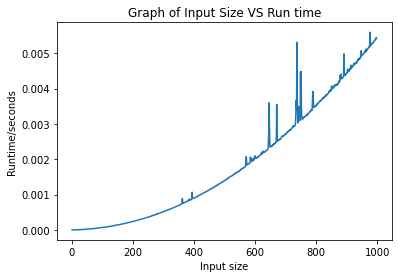

In [17]:
# for test run it will be more efficent to comment the print statements above.
tracker = []
input_size = []
run_time = []
experiments = 50

for i in range(2, 1000):
    no_exp = []
    for n in range(1,i):
        no_exp.append( Task( id = i-1, description = i, duration = random.randrange(10, 1000), dependencies = []))
    tracker.append(no_exp)

for i in tracker:
    average = []
    for x in range(experiments):
        start = time.process_time()
        tasks_scheduler = TaskScheduler(i)
        tasks_scheduler.run_task_scheduler(start_scheduler)
        average.append(time.process_time()-start)
    
    input_size.append(len(i))
    run_time.append(sum(average)/experiments)

plt.plot(input_size, run_time)
plt.xlabel('Input size')
plt.ylabel('Runtime/seconds')
plt.title('Graph of Input Size VS Run time')